In [3]:
from prices import Database

GOLD = "WGC/GOLD_DAILY_USD"
GLD = "GLD"
SAVE_LOCATION = "c:\\temp\\"
DATE = "date"
PRICE = "price"

s1 = "select * from price where symbol='{}'"
s2 = "select * from provider"

data = Database()

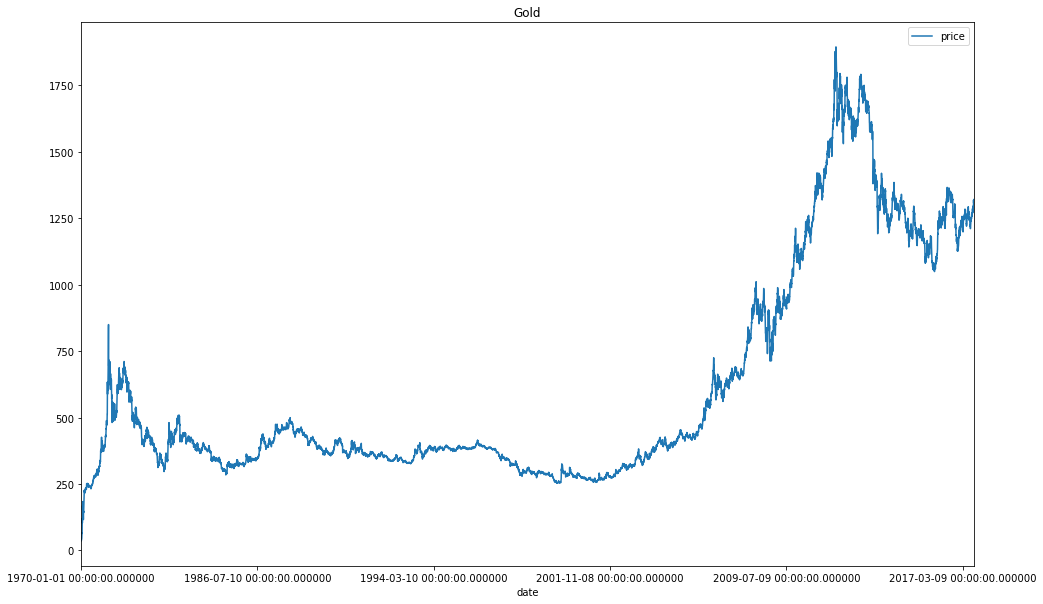

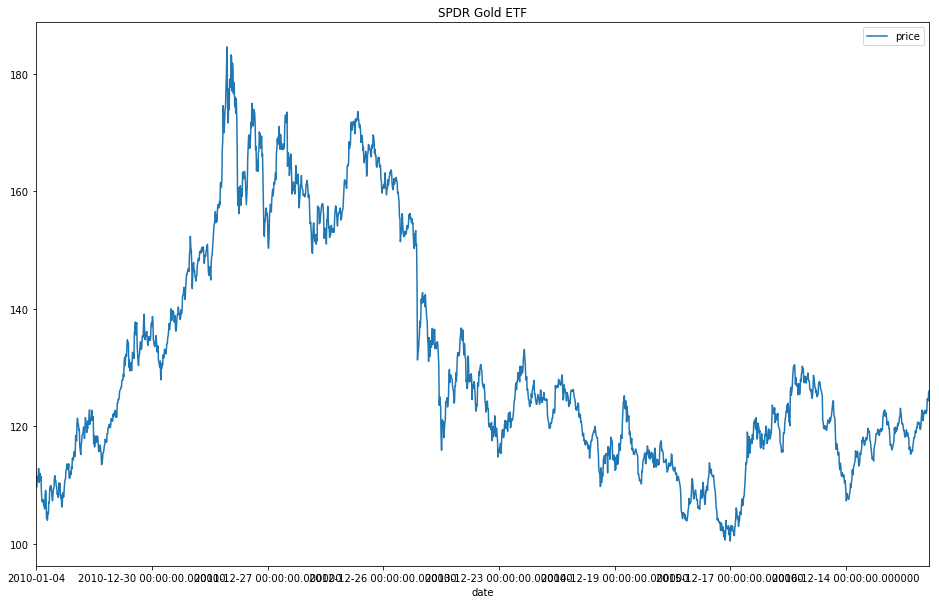

In [43]:
%matplotlib inline

gold = data.get(s1.format(GOLD))
gld = data.get(s1.format(GLD))


gold_chart = gold.plot(x=DATE,y=PRICE, title='Gold', figsize=(16,10)).get_figure()
gold_chart.savefig(SAVE_LOCATION + "gold_chart_20170907.png")

gld_chart = gld.plot(x=DATE,y=PRICE, title='SPDR Gold ETF', figsize=(16,10)).get_figure()
gld_chart.savefig(SAVE_LOCATION + "gld_chart_20170907.png")

In [44]:
print(gold.tail())

                   symbol                        date   price
10122  WGC/GOLD_DAILY_USD  2017-08-28 00:00:00.000000  1285.3
10123  WGC/GOLD_DAILY_USD  2017-08-29 00:00:00.000000  1318.7
10124  WGC/GOLD_DAILY_USD  2017-08-30 00:00:00.000000  1308.5
10125  WGC/GOLD_DAILY_USD  2017-08-31 00:00:00.000000  1311.8
10126  WGC/GOLD_DAILY_USD  2017-09-01 00:00:00.000000  1320.4


In [62]:
import pandas
sdate_gold = [a_date[0:10] for a_date in gold['date']]
sd = pandas.Series(sdate_gold)
gold['date'] = sd
print(gold.tail())

                   symbol        date   price
10122  WGC/GOLD_DAILY_USD  2017-08-28  1285.3
10123  WGC/GOLD_DAILY_USD  2017-08-29  1318.7
10124  WGC/GOLD_DAILY_USD  2017-08-30  1308.5
10125  WGC/GOLD_DAILY_USD  2017-08-31  1311.8
10126  WGC/GOLD_DAILY_USD  2017-09-01  1320.4


In [69]:
result = data.get("select * from price")
result.tail()

,symbol,date,price
130431,^FTAS,2017-09-04 00:00:00.000000,NaN
130432,^FTAS,2017-09-05 00:00:00.000000,4044.600098
130433,^FTAS,2017-09-06 00:00:00.000000,4034.300049
130434,^FTAS,2017-09-07 00:00:00.000000,4054.620117
130435,^FTAS,2017-09-08 00:00:00.000000,4038.340088


In [72]:
sdate = [a_date[0:10] for a_date in result['date']]
sd = pandas.Series(sdate)
result['date'] = sd
data.set('price', result)